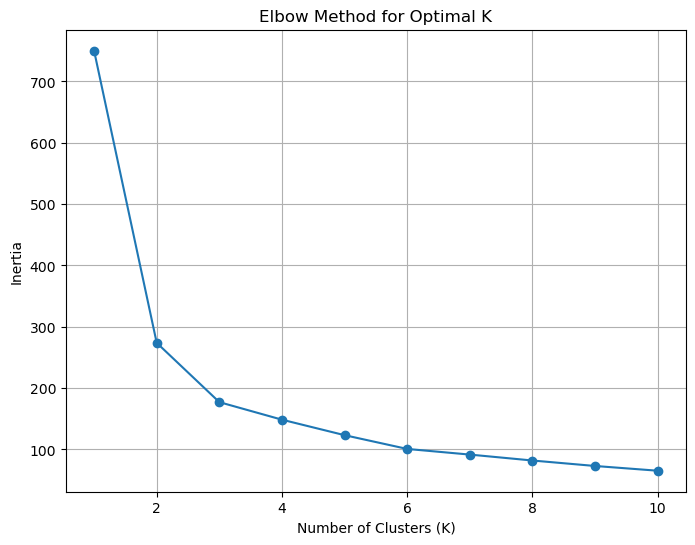

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0   1            5.1           3.5            1.4           0.2  Iris-setosa   
1   2            4.9           3.0            1.4           0.2  Iris-setosa   
2   3            4.7           3.2            1.3           0.2  Iris-setosa   
3   4            4.6           3.1            1.5           0.2  Iris-setosa   
4   5            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


In [105]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Iris.csv')

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Species', axis=1))

# Range of K values to test
k_values = range(1, 11)

# Initialize lists to store inertia (within-cluster sum of squares) for each K
inertia = []

# Perform K-Means clustering for different values of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Optimal number of clusters (choose based on the elbow plot)
optimal_k = 3

# Perform K-Means clustering with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Assign cluster labels to the original dataset
data['Cluster'] = clusters

# Display or save the results as needed
print(data.head())
